<a href="https://colab.research.google.com/github/dhilligo/PHYS633S22/blob/main/Hilligoss_Dylan_13_LimbDarkening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red">13 - Limb Darkening</font>

We start by importing the modules
* Numpy -- operations on arrays and matrixes (and pi)
* Matplotlib pyplot -- plotting library
* Matplotlin patches -- module that enables patches in plots
* Astropy units -- defined quantities with units. We also import the CDS conversions

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline 

from astropy import constants as const
import astropy.units as u
from astropy.units import cds
cds.enable()

## 1. In class: We can start by creating a polar grid (make sure to execute)

The grid represent the projected disk of a star on the sky, where $\alpha$ is the distance from the center of the disk (let's normalize the edge of the disk by $\alpha=1$), and $\varphi$ is the azimutal angle aroung the center of the disk. 

For later, we will also need the area on the sky represented by each grid point ($\sim\alpha d\alpha d\varphi$), as well as the value of $u$. We saw earlier in the course (when discussing intensity vs flux) that we can relate the value of $u$ and $\alpha$ by 
$$u = (1-\alpha^2)^{1/2}.$$

In [3]:
# Create a 2D grid in polar coordinates where 
# alpha is the radius from the center of the circle
# phi is the angle around the circle

n_phi = 1000 # number of phi angles
n_alpha = 1000   # number of radii
#n_phi1=10
#n_alpha1=10
alpha = np.linspace(0, 1, n_alpha)
phi = np.radians(np.linspace(0, 360-(360/n_phi), n_phi))
#alpha1=np.linspace(0, 1, n_alpha1)
#phi1=np.radians(np.linspace(0, 360-(360/n_phi1), n_phi1))

#---------------------------------------
# In class


alpha_grid, phi_grid = np.meshgrid(alpha,phi)



#---------------------------------------
# We will need the projected area dA cos(theta)
# Area of a ring = 2 pi alpha dalpha
# Area of a rind segment = area of ring / number of segments

area_grid = 2*np.pi * alpha_grid * (1.0/n_alpha) / n_phi

# and the value of u=cos(theta)

u_grid = (1.0 - alpha_grid **2)**0.5

## 2. In class: Just a quick visualization of the grid

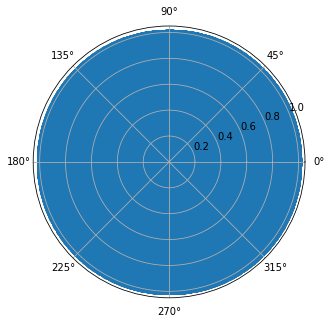

In [4]:
# We can get a figure in polar coordinate by using a "projection"
fig, ax = plt.subplots(1,1,subplot_kw=dict(projection='polar'), figsize=(5,5))

#------------------------------
# In class

ax.scatter(phi_grid,alpha_grid)


## 3. In class: let's look at the effect of Limb-darkening

**IMPORTANT** Make sure to change the number of $\alpha$ and $\phi$ to 1000 in #1 and re-execute, to get a fine grid. 

> **TODO**: Below, provide an explanation (in words and math) that describes the calculations that we are performing in the code

***ANSWER***: In this section, I study the effects of limb darkening for different source function slope values. To obtain meaningful results, I use the equation for intensity of a flat, semi-infinite atmosphere. $$I_{obs}(u>0)=I(\tau_{z}=0,u>0)=\int_{\tau_z=0}^{\tau_z=∞}S(\tau_{z}^{'})e^\frac{\tau_{z}-\tau_{z}^{'}}{u}d\tau_z^{'}$$ Assuming a linearly increasing source function $$S(\tau_{z}^{'})=S_0+S_1\tau_{z}^{'}=S(u)=S_0+S_1u$$ Here, u is our grid point values, not $cos(\theta)$.

So to obtain our images, we use the following equation after integrating and some simplification... $$\frac{I_{obs}(u)}{I_{obs}(u=1)}=\frac{1+\frac{S_1}{S_0}u}{1+\frac{S_1}{S_0}}$$

To obtain different results and study the effects of limb darkening, we changed values of $S_1/S_0$, which is the normalized source slope.

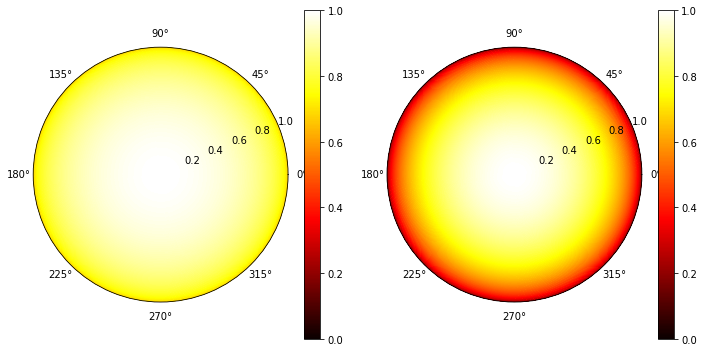

In [5]:
fig, ax = plt.subplots(1,2,subplot_kw=dict(projection='polar'), figsize=(10,5))

# Loading a colormap
cmap = plt.cm.hot

#--------------------------------------------
# In class

Source_slope = 0.5

I = (1+Source_slope*u_grid)/(1+Source_slope)

solar1=ax[0].pcolormesh(phi_grid,alpha_grid,I,vmin=0,vmax=1.0,cmap=cmap)
plt.colorbar(solar1,ax=ax[0])

# Copy paste, change ax and source function slope
Source_slope1 = 5.0

I1 = (1+Source_slope1*u_grid)/(1+Source_slope1)
solar2=ax[1].pcolormesh(phi_grid,alpha_grid,I1,vmin=0,vmax=1.0,cmap=cmap)
plt.colorbar(solar2,ax=ax[1])

# ---------------------
plt.tight_layout()

> **TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>

***ANSWER***: In the above diagram, I show the effects of limb darkening when the source slope is changed. On the left-hand figure, I have a source slope of 0.5. This source slope causes no limb darkening effects since the source function is changing very slowly. In the right-hand figure, the source slope is now equal to 5.0. Having a significantly higher source slope causes the effects of limb darkening to be more pronounced, as seen in the image.

## 4. A simple estimate of planet transit

Each point in our polar grid can be transformed into cartesian coodinates, as
$$x = \alpha \cos(\varphi)$$
$$y = \alpha \sin(\varphi)$$

The cartesian equation for a circle if radius $R$ centered on the coordinate $x_o$ and $y_o$ is 
$$(x - x_o)^2 + (y - y_o)^2 = R^2.$$

Therefore, if we place a place a planet anywhere on our star's disk, we can simply set the intensity to zero for every grid point where the following condition is met:
$$(x - x_o)^2 + (y - y_o)^2 \leq R^2!$$

To get the total flux coming out of the star, we can do a numerical integration by doing a sum of the product of $I$ * Area on the disk. (You can convince yourself that this is correct from our discussion of the observed intensity vs observed flux.)

The change in flux will be 0.997


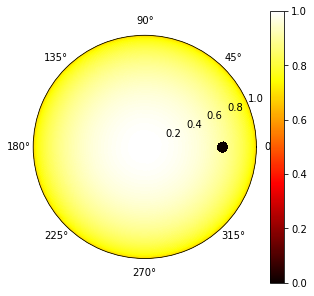

In [6]:
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'), figsize=(5,5))

Source_slope = 0.5
I = (1 + Source_slope*u_grid) / (1+Source_slope)

#--------------------------
# In class
# radius ratio of our planet
R=0.05

#Planet location
x0=0.7
y0=0.0

x_grid=alpha_grid*np.cos(phi_grid)
y_grid=alpha_grid*np.sin(phi_grid)

planet=np.where(((x_grid-x0)**2+(y_grid-y0)**2)<=R**2)

# Take a copy of the intensity grid

I_transit=np.copy(I)

I_transit[planet]=0




#----------------------------------
# In class, uncomment the following
# Make an image of the star + planet

co = ax.pcolormesh(phi_grid, alpha_grid, I_transit, cmap=cmap, vmin=0)
plt.colorbar(co)
#----------------------------------



# Find the total flux coming out of the star without the planet

Flux_o=np.sum(I*area_grid)

# Find the total flux coming out of the star with the planet

Flux_transit=np.sum(I_transit*area_grid)
#----------------------------------
#In class, uncomment the following:

print('The change in flux will be {:0.3g}'.format(Flux_transit / Flux_o))
#----------------------------------


## 5. At home: by using a series of $x_o$ values, we can make a transit curve!

I provide a piece of code below that will create a transit curve, by making the planet (dark circle) cross the stellar disk horizontally. 

If you study the code, you will see that there are different parameters that you can modify. 

> **TODO**: use the code below to make a study of how the shape of the planet transit changes according to the different parameters. Make sure to include the effect of different limb darkening in your study. 
>
> In the interpretation box below, you will describe the results of your study, using graphs that you will create with the code to support your results. 

Text(0, 0.5, 'Flux')

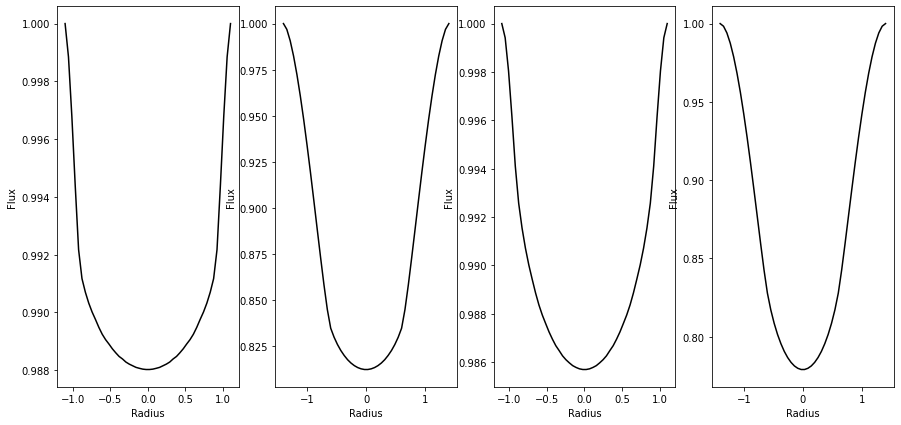

In [34]:
#
fig, ax=plt.subplots(1,4, figsize=(15,7))
#fig = plt.figure()

# Example for one set of parameters:
#-------------------------------------------------
#-------------------------------------------------
#ax = fig.add_subplot(121)

Source_slope = 1
I = (1 + Source_slope*u_grid) / (1+Source_slope)
Flux_o = np.sum(I * area_grid)
R = 0.1
# Where is the planet?
x0_array = np.linspace(-1-R,1+R,50) # array of xo to mimic a transit
y0 = 0
x_grid = alpha_grid * np.cos(phi_grid)
y_grid = alpha_grid * np.sin(phi_grid)

# The value of the transit are stored in "F_transit"
F_transit = np.array([])    
# Make the planet cross the star:
for x0 in x0_array:
  I_transit = np.copy(I)
  planet = np.where( ( (x_grid - x0)**2 + (y_grid - y0)**2 ) <= R**2  )  
  I_transit[planet] = 0.0
  F_transit = np.append(F_transit, np.sum(I_transit * area_grid))

ax[0].plot(x0_array, F_transit/Flux_o, c='k') 
ax[0].set_xlabel("Radius")
ax[0].set_ylabel("Flux")
#ax[0].set_title(r"Flux vs. Radius for $0.1R_\odot$ Planet with Source Function =1")
#-------------------------------------------------
#-------------------------------------------------
#ax1 = fig.add_subplot(122)
Source_slope = 1
I = (1 + Source_slope*u_grid) / (1+Source_slope)
Flux_o = np.sum(I * area_grid)
R = 0.4
# Where is the planet?
x0_array = np.linspace(-1-R,1+R,50) # array of xo to mimic a transit
y0 = 0
x_grid = alpha_grid * np.cos(phi_grid)
y_grid = alpha_grid * np.sin(phi_grid)

# The value of the transit are stored in "F_transit"
F_transit = np.array([])    
# Make the planet cross the star:
for x0 in x0_array:
  I_transit = np.copy(I)
  planet = np.where( ( (x_grid - x0)**2 + (y_grid - y0)**2 ) <= R**2  )  
  I_transit[planet] = 0.0
  F_transit = np.append(F_transit, np.sum(I_transit * area_grid))

ax[1].plot(x0_array, F_transit/Flux_o, c='k') 
ax[1].set_xlabel("Radius")
ax[1].set_ylabel("Flux")
#ax[1].set_title(r"Flux vs. Radius for $0.4R_\odot$ Planet with Source Function =1")

# At home, make a few transit light curves for a set of parameters.
# How does the shape of the transit changes if 
# the radius of the planet, or the limb-darkening of the star changes?

#ax2 = fig.add_subplot(123)
Source_slope = 10
I = (1 + Source_slope*u_grid) / (1+Source_slope)
Flux_o = np.sum(I * area_grid)
R = 0.1
# Where is the planet?
x0_array = np.linspace(-1-R,1+R,50) # array of xo to mimic a transit
y0 = 0
x_grid = alpha_grid * np.cos(phi_grid)
y_grid = alpha_grid * np.sin(phi_grid)

# The value of the transit are stored in "F_transit"
F_transit = np.array([])    
# Make the planet cross the star:
for x0 in x0_array:
  I_transit = np.copy(I)
  planet = np.where( ( (x_grid - x0)**2 + (y_grid - y0)**2 ) <= R**2  )  
  I_transit[planet] = 0.0
  F_transit = np.append(F_transit, np.sum(I_transit * area_grid))

ax[2].plot(x0_array, F_transit/Flux_o, c='k') 
ax[2].set_xlabel("Radius")
ax[2].set_ylabel("Flux")

##

#ax3 = fig.add_subplot(124)
Source_slope = 10
I = (1 + Source_slope*u_grid) / (1+Source_slope)
Flux_o = np.sum(I * area_grid)
R = 0.4
# Where is the planet?
x0_array = np.linspace(-1-R,1+R,50) # array of xo to mimic a transit
y0 = 0
x_grid = alpha_grid * np.cos(phi_grid)
y_grid = alpha_grid * np.sin(phi_grid)

# The value of the transit are stored in "F_transit"
F_transit = np.array([])    
# Make the planet cross the star:
for x0 in x0_array:
  I_transit = np.copy(I)
  planet = np.where( ( (x_grid - x0)**2 + (y_grid - y0)**2 ) <= R**2  )  
  I_transit[planet] = 0.0
  F_transit = np.append(F_transit, np.sum(I_transit * area_grid))

ax[3].plot(x0_array, F_transit/Flux_o, c='k') 
ax[3].set_xlabel("Radius")
ax[3].set_ylabel("Flux")
#plt.show()

> **TODO**: Describe your results (and interpretation of your results) here. 

***ANSWER***: In the above section of this notebook, I examined planet transit light curves for planets of different radii. For smaller planet radii, the light curve had sharper edges. Also, there is a smaller decrease in the flux. Larger radii cause the flux to drop more substantially due to the fact that the planet is blocking more light from the star during its transit.
I also adjusted the source slope to see the effects on planet transit light curves. For higher and higher source slope values, the curve became more rounded (almost in the shape of a bowl). This suggests that the flux drops off more slowly than for smaller source slope values.

<font color="yellow">***For reference, the above table of figures highlights 4 different cases:***

<font color="yellow">The leftmost plot, represents a star with a $0.1R$ orbitting planet and a source function of 1.0. 

<font color="yellow">The next figure is a star with a $0.4R$ orbitting planet and a source function of 1.0.

<font color="yellow">The third plot shows a star with a $0.1R$ orbitting planet but a source function of 10.0.

<font color="yellow">The rightmost plot in the figure shows a star with a $0.4R$ orbitting planet and a source function equal to 10.0.